In [69]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np

In [110]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [85]:
data=pd.read_csv('./results/main.csv')

In [91]:
data.head()

,corr_stocks,corr_oil,noisy_trader,przemek_trader,start_ind
0,-0.737928,0.813761,600,0,0
1,-0.673959,0.813761,550,50,0
2,-0.306098,0.813761,500,100,0
3,0.340609,0.813761,450,150,0
4,0.371500,0.813761,400,200,0


In [92]:
dsorted=data.sort_values(['corr_stocks'],ascending=False)
dsorted.head(20)

,corr_stocks,corr_oil,noisy_trader,przemek_trader,start_ind
136,0.931536,0.688851,450,150,1900
134,0.912941,0.688851,550,50,1900
139,0.903925,0.688851,300,300,1900
14,0.891318,0.350167,600,0,200
137,0.886291,0.688851,400,200,1900
138,0.879189,0.688851,350,250,1900
82,0.861943,0.428886,350,250,1100
83,0.857508,0.428886,300,300,1100
91,0.853450,0.157819,600,0,1300
92,0.852747,0.157819,550,50,1300


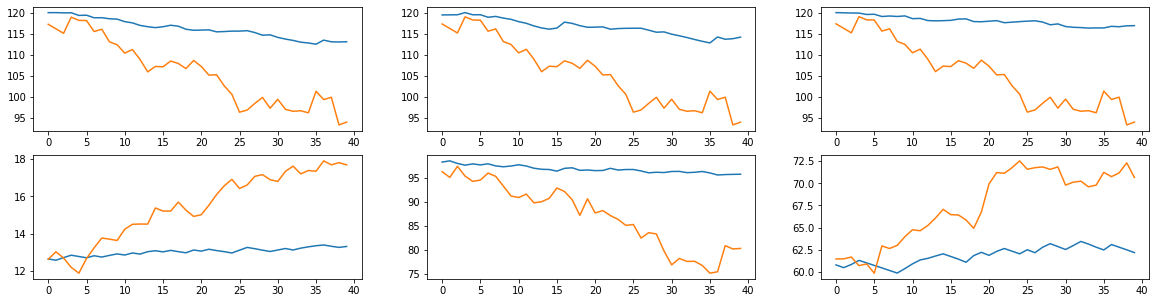

In [101]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axs = plt.subplots(2,3)
axs[0,0].plot(pd.read_csv('./results/136.csv',header=None)[[0,2]][5:].to_numpy())
axs[0,1].plot(pd.read_csv('./results/134.csv',header=None)[[0,2]][5:].to_numpy())
axs[0,2].plot(pd.read_csv('./results/139.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,0].plot(pd.read_csv('./results/14.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,1].plot(pd.read_csv('./results/82.csv',header=None)[[0,2]][5:].to_numpy())
axs[1,2].plot(pd.read_csv('./results/91.csv',header=None)[[0,2]][5:].to_numpy())
plt.show()

In [94]:
for i in range(175):
    file='./results/'+str(i)+'.csv'
    a=pd.read_csv(file,header=None)
    x,y=a[[0]].to_numpy().reshape(-1),a[[2]].to_numpy().reshape(-1)
    x,y=x[5:],y[5:]
    a=np.corrcoef(x,y)[0,1]
    if 0>a:
        data.at[i,'corr_stocks']=a
data.to_csv('./results/main_fixed.csv')

Jak widać na pierwszych 20 posortowanych rekordach dobre wyniki (wysoka korelacja pomiędzy przebiegami giełdy rzeczywistymi i symulowanymi) są osiągane dla konkretnych punktów startowych

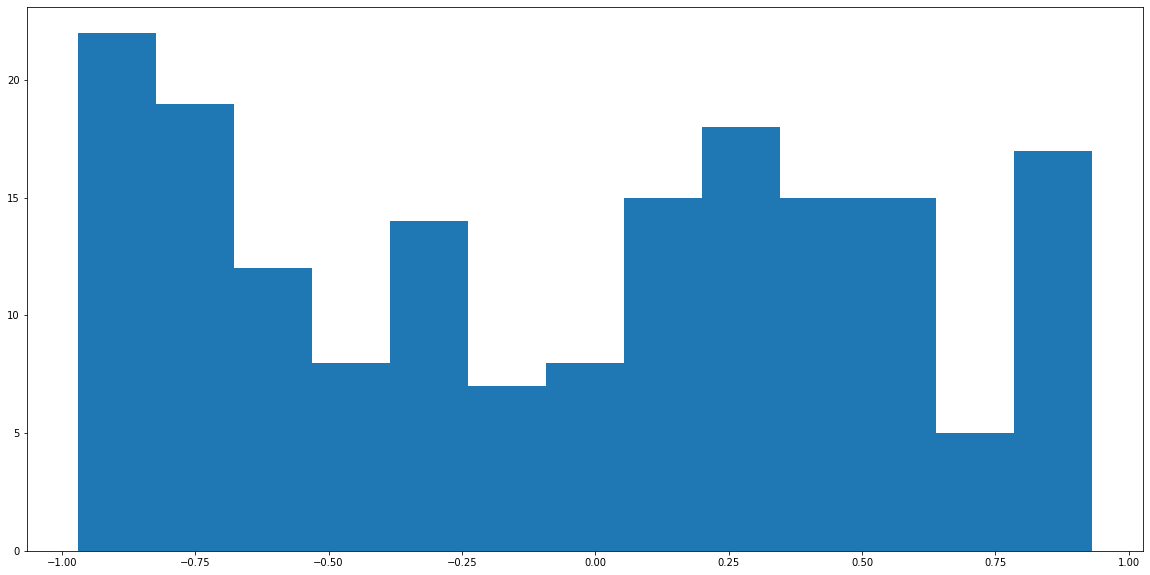

In [98]:
plt.hist(dsorted['corr_stocks'].to_numpy(),bins=13)
plt.show()

Histogram wskazuje na to, że 2 różne rodzaje symulacji zostały ze sobą zmieszane

In [111]:
a=dsorted.query('corr_stocks < 0').groupby('przemek_trader').count()
b=dsorted.query('corr_stocks > 0').groupby('przemek_trader').count()
display_side_by_side(a,b)

,corr_stocks,corr_oil,noisy_trader,start_ind
przemek_trader,,,,
0,9,9,9,9
50,11,11,11,11
100,12,12,12,12
150,15,15,15,15
200,13,13,13,13
250,14,14,14,14
300,13,13,13,13
,corr_stocks,corr_oil,noisy_trader,start_ind
przemek_trader,,,,


Dodanie inteligentnych traderów nie wpływa na wartość korelacji (to czy będzie mniejsza czy większa od 0).

In [120]:
print(dsorted[['corr_stocks','start_ind']].query('corr_stocks < 0').count())
print(dsorted[['corr_stocks','start_ind']].query('corr_stocks > 0').count())

corr_stocks    87
start_ind      87
dtype: int64
corr_stocks    88
start_ind      88
dtype: int64


Prawie taka sama liczba symulacji ma korelację dodatnią i ujemną 

In [118]:
a=dsorted[['corr_stocks','start_ind']].query('corr_stocks < 0').groupby('start_ind').count()
b=dsorted[['corr_stocks','start_ind']].query('corr_stocks > 0').groupby('start_ind').count()
me=dsorted[['corr_stocks','start_ind']].groupby('start_ind').mean()
st=dsorted[['corr_stocks','start_ind']].groupby('start_ind').std()
display_side_by_side(a,b,me,st)

,corr_stocks
start_ind,
0,3
200,5
300,5
500,2
600,4
700,4
900,4
1000,2
1100,1


Pierwsze tabela (od lewej) prezentuje liczbę modeli mających ujemną korelację zaczynających od danego indexu
Następna prezentuje liczbę modeli z korelacją dodatnią
Następnie tabela prezentuje średnią korelację dla danego indeksu startowego
Na końcu jest przedstawione odchylenie standardowe korelacji dla danego indeksu startowego
Można zatem wnioskować, że model jest podatny na punkt startowy. W tabeli 3 można znaleźć klaster (1800), który koncentruje dodatnie korelacje, jednakże wszyskite punkty startowe chrakteryzują się wysokim odchyleniem standardowym. 

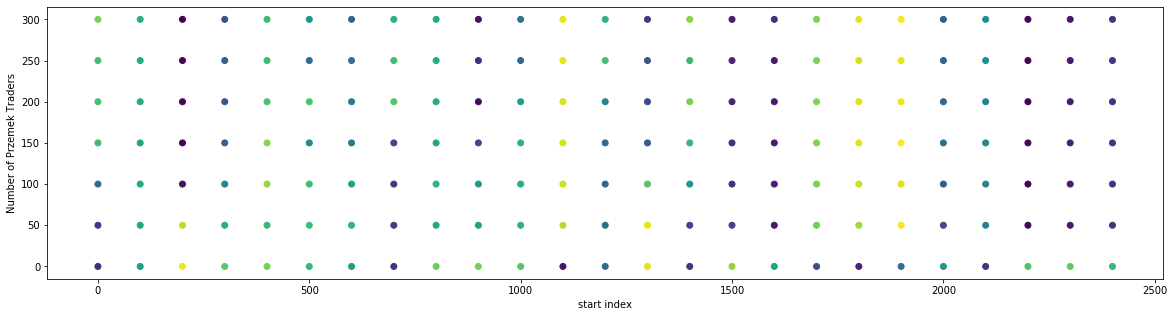

In [132]:
plt.scatter(x=data['start_ind'],y=data['przemek_trader'],c=(data['corr_stocks']+1)*128)
plt.xlabel('start index')
plt.ylabel('Number of Przemek Traders')
plt.show()

Jak widać na powyższym wykresie (im punkt bardziej fioletowy tym wyższa korelacja) kolory punktów układają się w pionowe pasy. Wynika z tego, że model jest podatny na punkt startowy. Jednocześnie można wywnioskować, że liczba inteligentnych traderów nie bardzo znaczącym paramterem.

In [137]:
print('Średnia korelacja \t',data['corr_stocks'].mean())
print('Std \t\t\t',data['corr_stocks'].std())

Średnia korelacja 	 -0.0644767631731853
Std 			 0.5841062282559494


Podsumowując model wymaga dopracowania, w 50% przypadków korelacja jest dodatnia, co jest pożądane. Głównymi problemami, którymi trzeba by było jeszcze rozwiązać to wyeliminowanie korelacji ujemnej oraz zmniejszenie wpływu punktu startowego na wynik symulacji.